# Estadística Descriptiva
## Elaborado por Juan Camilo Florez Caro
## https://www.linkedin.com/in/juancamiloflorezcaro/
El siguiente Notebook tiene como objetivo mostrar como se podría construir un análisis estadístico descriptivo haciendo uso tanto de Python como de PowerBI. Este análisis sugiere seguir algunas etapas donde para cada una de ellas se propone la IDE más adecuada conforme al proposito que se persigue. 

De esta manera las Etapas mostradas a continuación son:

### Etapa 1: Preparación de la Información (Data wrangling)
* <b>Paso 1: </b>Importar librerias necesarias en nuestro entorno de trabajo
* <b>Paso 2: </b>Importar la información y realizar las transformaciones necesarias para poder utilizarla (Entendimiento tipos de variables)
### Etapa 2: Entendimiento de la información
* <b>Paso 3: </b>Cálculo de medidas de tendencia central (Promedio, Desviación, Percentiles, Media y Moda)
### Etapa 3: Análisis gráfico de la información con Python (matplotlib y seaborn )
* <b>Paso 4: </b>Análisis gráficos univariados
* <b>Paso 5: </b>Análisis gráficos bivariados 
### Etapa 4: Análisis gráfico con PowerBI y Python
* <b>Paso 6: </b>Análisis gráficos univariados y bivariados en PowerBI haciendo uso de Python 

## Paso 1: Importar las librerias que requerimos e identificar el entorno donde nos encontramos trabajando
<b>Nota: </b> usualmente, el entorno donde trabajamos con vs code se ubica en la misma carpeta donde nos encontramos trabajando

In [2]:
import pandas as pd #Para poder trabajar con DataFrames
import numpy as np #Funciones para calculos matematicos
import os #Para conocer el sistema sobre el que trabajamos
import matplotlib.pyplot as plt #Visualización
import seaborn as sns #Visualizacion 
from scipy import stats #Funciones estadísticas
from IPython.display import Image #Abrir alrchivos de imagen

En qué Working Directory estamos trabajando?

In [ ]:
os.getcwd()

## Paso 2: Importar la información y realizar las transformaciones necesarias para poder utilizarla

In [3]:
#Url de los dataset https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+title_principals.csv

movies = pd.read_csv(r'Datasets\IMDb Movies 2020\IMDb movies.csv')

C:\Users\1016038645\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


Exploramos las variables básicas del dataset (Número de registros y tipos de las variables)

In [4]:
print('El dataset cuenta con '+str(len(movies))+' registros')
print('\n')
print('A continuación se muestran los tipos de los campos')
movies.dtypes

El dataset cuenta con 85855 registros


A continuación se muestran los tipos de los campos


imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

### De qué tipo son las variables que tenemos?

Como nos podemos dar cuenta al importar un dataset se predefinen las tipologias de las variables según lo que intuye pandas, no obstante con frecuencia estos requieren ajustarse, por lo cual es importante conocer los diferentes tipos de variables que podemos encontrar (Tanto para python como en R suele ser un paso que debemos realizar) 

<b>Metricas </b>
* Discretas int
* Continuas float

<b>Categoricas </b>
* Ordinales/Nominales object (En R se pueden diferenciar)
* Dicotomicas bool
* Fechas date

Así entonces, a continuación agrupamos cada una de las variables en listas según el tipo al que pertenecen:

In [4]:
#Categoricas

#Nominales y Ordinales (str / object)

cat_nominales = [
'imdb_title_id',
'title',
'original_title',
'genre',
'country',
'language',
'director',
'writer',
'production_company',
'actors',
'description']


#Fechas (date)


cat_fechas = [
'year',
'date_published']


#Metricas
#Discretas (int64)

met_discretas =[
'duration',
'votes',
'reviews_from_users',
'reviews_from_critics']

#continuas (int64)
met_continuas =[
'avg_vote',
'budget',
'usa_gross_income',
'worlwide_gross_income',
'metascore']

#### Transformación de las variables

Habitualmente, nos solemos encontrar con transformaciones adicionales que debemos realizar para poder trabajar con la iformación como lo es lidiar con valores nulos o caracteres extraños en los campos de los data set que trabajamos


In [6]:
movies['budget'].head()

0        NaN
1     $ 2250
2        NaN
3    $ 45000
4        NaN
Name: budget, dtype: object

Como nos damos cuenta, requerimos inicialmente ajustar el tipo de las variables y retirar el simbolo de '$' para poder transformar las variables con Dinero en variables metricas por lo cual a continuación se muestra como se hacen cada uno de los ajustes

* Ajuste simbolos

In [5]:
ajuste_pesos = ['budget','usa_gross_income', 'worlwide_gross_income']

for i in ajuste_pesos:
    movies[i] = movies[i].str.replace('$',"")

* Ajuste tipo de variables

In [6]:

for i in cat_fechas:
    movies[i] = pd.to_datetime(movies[i],errors = 'coerce')

for i in cat_nominales:
    movies[i] = movies[i].astype('str')

for i in met_continuas:
    movies[i] = pd.to_numeric(movies[i], errors = 'coerce', 
    downcast = 'float')

for i in met_discretas:
    movies[i] = pd.to_numeric(movies[i], errors = 'coerce', 
    downcast = 'integer')


Luego de realizar los ajustes en símbolos y en tipo nos damos cuenta que la variable 'budget' cuenta con dtype:float32 lo cual indica que es una variable métrica contínua y ya no muestra el signo "$" que anteriormente lo definia como una variable categorica

In [9]:
movies['budget'].head()

0        NaN
1     2250.0
2        NaN
3    45000.0
4        NaN
Name: budget, dtype: float32

# Paso 3: Medidas de tendencia Central

Luego de tener nuestro dataset "entendible", es cuando podemos empezar a "jugar" con la información. Para este caso como el objetivo aplicar algunos conceptos de estadistica descriptiva iniciaremos con:
* <b>Paso 3: </b>el cálculo de medidas de tendencia central (Promedio, Desviación, Percentiles, Media y Moda);
* <b>Paso 4: </b>Posteriormente construiremos algunos Análisis gráficos univariados;
* <b>Paso 5: </b>Luego elaboraremos gráficos tipicos para los análisis bivariados haciendo uso de matplotlib y seaborn, y finalmente 
* <b>Paso 6: </b> entendiendo que jupyter es una IDE destinada al procesamiento y analisis de la información, veremos como estas mismas visualizaciones se pueden llevar a PowerBI ( Una herramienta realmente destinada a la visualización de la información)

## Medidas de tendencia Central
A continuación usaremos la funcion <code>.describe()</code> con la cual podemos calcular estas medidas dependiendo del tipo de variables a las que nos enfrentemos
* Para las variables metricas - continuas

In [10]:
movies[met_continuas].describe()

,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore
count,85855.000000,16602.0,15321.0,3.095500e+04,13305.000000
mean,5.898590,14391354.0,19497390.0,2.252730e+07,55.896881
std,1.234906,28899202.0,48250856.0,8.882135e+07,17.784828
min,1.000000,0.0,30.0,1.000000e+00,1.000000
25%,5.200000,750000.0,93292.0,1.149520e+05,43.000000
50%,6.100000,3000000.0,1315498.0,1.108231e+06,57.000000
75%,6.800000,15000000.0,17127992.0,8.299774e+06,69.000000
max,9.900000,356000000.0,936662208.0,2.797800e+09,100.000000


<b>Dato Curioso:</b> Pero como quitamos la notación cientifica?

In [11]:
movies[met_continuas].describe().apply(lambda s: s.apply(lambda x: format(x, '.2f')))

,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore
count,85855.00,16602.00,15321.00,30955.00,13305.00
mean,5.90,14391354.00,19497390.00,22527300.00,55.90
std,1.23,28899202.00,48250856.00,88821352.00,17.78
min,1.00,0.00,30.00,1.00,1.00
25%,5.20,750000.00,93292.00,114952.00,43.00
50%,6.10,3000000.00,1315498.00,1108231.00,57.00
75%,6.80,15000000.00,17127992.00,8299774.50,69.00
max,9.90,356000000.00,936662208.00,2797800448.00,100.00


* Para las variables Metricas - Discretas

In [12]:
movies[met_discretas].describe().apply(lambda s: s.apply(lambda x: format(x, '.2f')))

,duration,votes,reviews_from_users,reviews_from_critics
count,85855.00,85855.00,78258.00,74058.00
mean,100.35,9493.49,46.04,27.48
std,22.55,53574.36,178.51,58.34
min,41.00,99.00,1.00,1.00
25%,88.00,205.00,4.00,3.00
50%,96.00,484.00,9.00,8.00
75%,108.00,1766.50,27.00,23.00
max,808.00,2278845.00,10472.00,999.00


* Para las variables Categoricas - Fechas

In [13]:
movies[cat_fechas].describe()

,year,date_published
count,85854,85854
unique,167,21916
top,2017-01-01 00:00:00,2010-01-01 00:00:00
freq,3223,129
first,1930-01-01 00:00:00,1894-10-09 00:00:00
last,2020-01-01 00:00:00,2021-05-07 00:00:00


Como nos damos cuenta, la funcion <code> .describe() </code> identifica automáticamente cuando se trata de una variable categorica, frente a la cual no calcula promedios o desviaciones, unicamente muestra la Moda y el numero de veces que esta moda se repite

* Para las variables categoricas - nominales

In [14]:
movies[cat_nominales].describe()

,imdb_title_id,title,original_title,genre,country,language,director,writer,production_company,actors,description
count,85855,85855,85855,85855,85855,85855,85855,85855,85855,85855,85855
unique,85855,82094,80852,1257,4908,4378,34734,66860,32051,85730,83612
top,tt2445568,Anna,Anna,Drama,USA,English,Jesús Franco,nan,nan,nan,nan
freq,1,10,10,12543,28511,35939,87,1572,4455,69,2115


* Para variables categoricas
<b>Pregunta</b> ¿Cual es el pais que mayor número de peliculas ha p

# Paso 4: Análisis Gráfico Univariado
Entrando en el análisis gráfico es importante desde un principio conocer el objetivo de cada visualización que deseamos crear, por lo cual a continuación para hacer más dinámico el ejercicio cada visualización vendrá acompañada de una pregunta que deseamos resolver y de esta forma dar sentido a cada una de las visualizaciones construidas

<b> a) Variables Categoricas:</b> si nos cuestionamos dentro del dataset que tenemos ¿Cuales paises produjeron más de 600 películas?, entonces deberíamos:

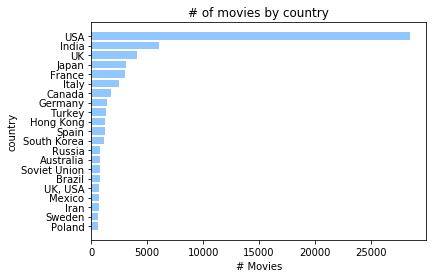

<Figure size 1080x1080 with 0 Axes>

In [7]:
pivot = movies.groupby('country').agg(count = ('imdb_title_id','count'),
                                    metascore_mean= ('metascore','count')).reset_index()

# Grafico de barras -Distrubución de frecuencias  (Categoricas)
serie = pivot[pivot['count']>600].sort_values('count') #Filtro de paises cuyo conteo de peliculas es superior a 600
plt.style.use('seaborn-pastel') #Definimos un tema
plt.barh(serie['country'],serie['count']) #Seleccionamos el tipo de gráfico
plt.title('# of movies by country') #Definimos el titulo que tendrá
plt.ylabel('country') #Nombramos el eje de Y
plt.xlabel('# Movies') #Nombramos el eje de X
plt.figure(figsize=(15,15)) #Definimos el tamaño de la imagen
plt.show() #Mostramos la imagen

 <b> b) Variables Metricas:</b>  ¿Cómo se distribuye la calificación promedio de cada pelicula evaluada con respecto al promedio general?

Para resolver esta pregunta tenemos varias alternativas, de las cuales a continuación se muestra como construir un gráfico de dispersión (Scatterplot), un boxplot, un histograma o un Gráfico de Densidad (KDE) como se ve a continuació, la elección depende especialmente del tipo de persona a quien se lo vayamos a mostrar, y de cual sea para nosotros más familiar:

In [ ]:
# Scatterplot (Diferencias vs la media (Varianza y desviación))
promedio = movies['avg_vote'].mean()

plt.style.use('seaborn-pastel')
plt.scatter(x=movies.index,y=movies['avg_vote'])
plt.scatter(x=movies.index,y=np.repeat(promedio,len(movies.index)))
plt.title('Diferencias vs la media')
plt.ylabel('Votación Promedio')
plt.xlabel('Observación')
plt.savefig('scatter.png') #Almacenamos la imagen dado su peso


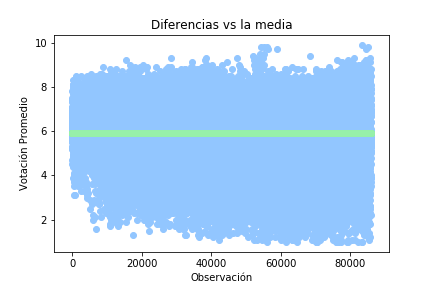

In [25]:
Image(filename='scatter.png') #abrimos la imagen

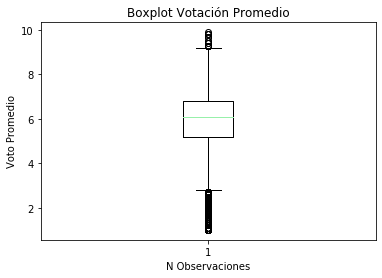

<Figure size 1080x1080 with 0 Axes>

In [15]:
#Boxplots (Rangos intercuartilicos)
plt.style.use('seaborn-pastel')
plt.boxplot(movies['avg_vote'])
plt.title('Boxplot Votación Promedio')
plt.ylabel('Voto Promedio')
plt.xlabel('N Observaciones')
plt.figure(figsize=(15,15))
plt.show()


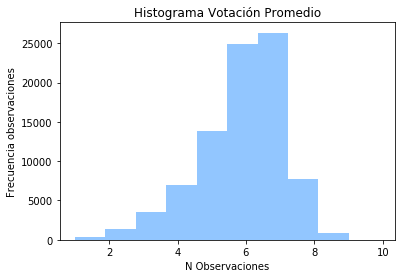

<Figure size 1080x1080 with 0 Axes>

In [16]:
#Histograma

plt.style.use('seaborn-pastel')
plt.hist(movies['avg_vote'])
plt.title('Histograma Votación Promedio')
plt.ylabel('Frecuencia observaciones')
plt.xlabel('N Observaciones')
plt.figure(figsize=(15,15))
plt.show()

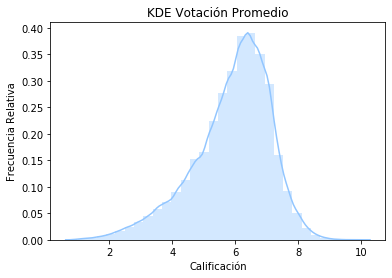

<Figure size 1080x1080 with 0 Axes>

In [17]:
# Density plot / KDE (Kernel Density Estimation)
plt.style.use('seaborn-pastel')
sns.distplot(movies['avg_vote'], hist=True, kde=True, bins = 30)
plt.title('KDE Votación Promedio')
plt.ylabel('Frecuencia Relativa')
plt.xlabel('Calificación')
plt.figure(figsize=(15,15))
plt.show()

# Paso 5: Análisis Bivariado

<b>a ) Metrica vs Metrica: </b> Al igual que en los análisis gráficos univariados, cada visualización debe ir acompañada de una pregunta a resolver, la diferencia con los análisis univariados es que en esta ocasión buscaremos entender si existe algún tipo de relación entre dos variables (Identificar que pasa con una variable en la medida que varía la otra)

Si nos preguntamos ¿ existe algún tipo de relación entre el "metascore" calculado por IMDb y la calificación promedio de cada película?, entonces:

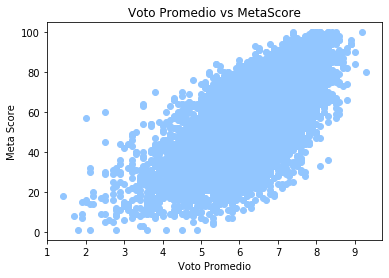

<Figure size 1080x1080 with 0 Axes>

In [18]:
# ScatterPlot
movies[['avg_vote','metascore']].dropna()

plt.style.use('seaborn-pastel')
plt.scatter(x=movies['avg_vote'],y=movies['metascore'])
plt.title('Voto Promedio vs MetaScore')
plt.ylabel('Meta Score')
plt.xlabel('Voto Promedio')
plt.figure(figsize=(15,15))
plt.show()

Logramos identificar que en la medida que el voto promedio (rating) por película es mayor, la calificación de IMDb tiende a ser mayor

Tip: Ahora bien, si quisieramos hacernos esta misma pregunta pero para todas y cada una de las combinaciones posibles entre las diferentes variables métricas que tenemos, podemos construir un "pairplot" como se myuestra a continuación:

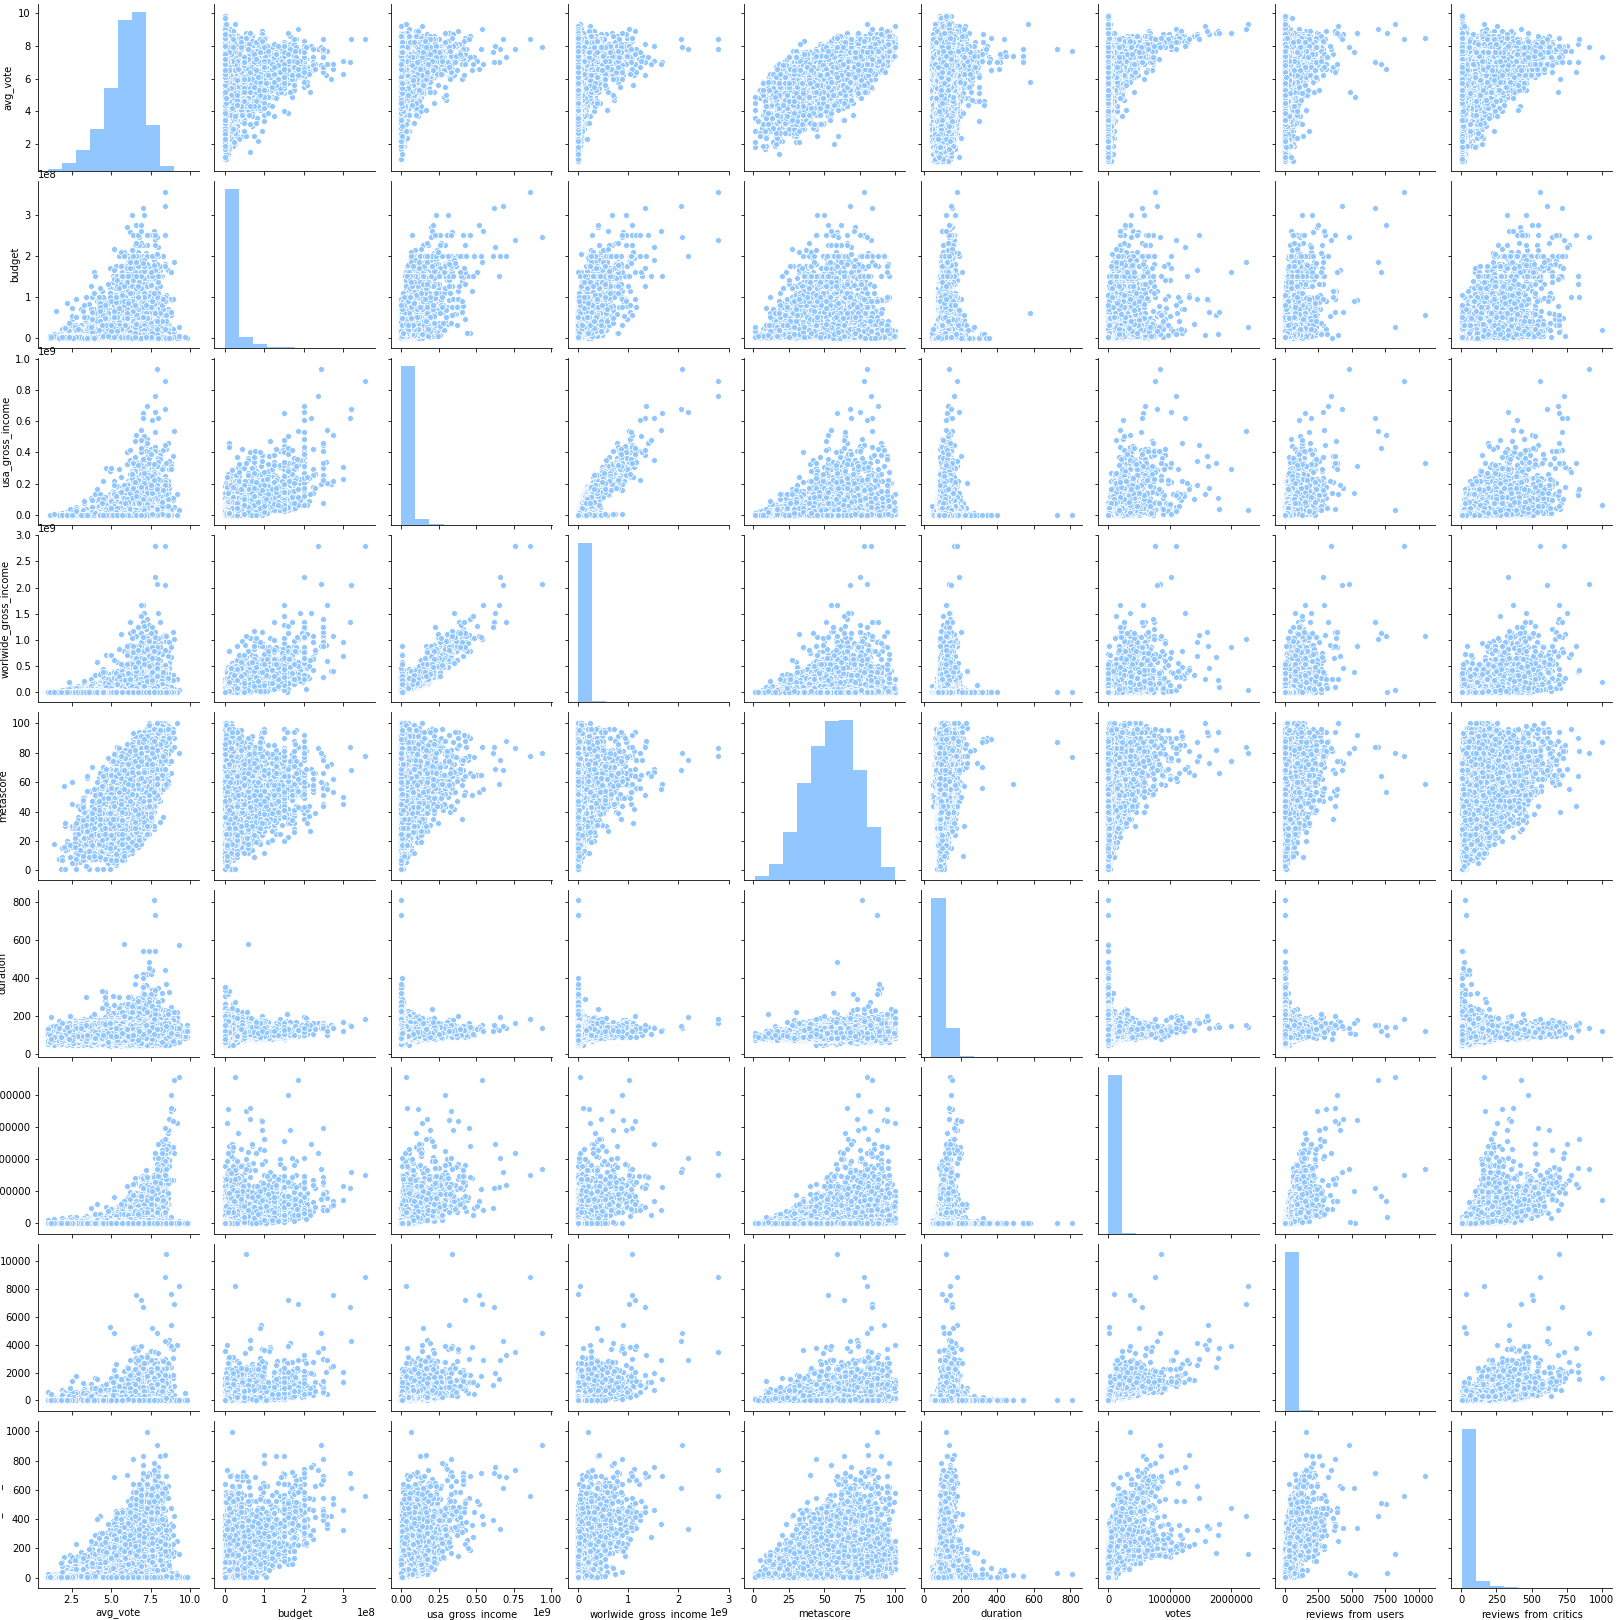

In [11]:
#Pair Plot https://seaborn.pydata.org/generated/seaborn.pairplot.html
# OJO: Tarda Bastante en correr ya que depende del numero de variables que estemos analizando por lo cual la alamacenaremos como una imagen en nuestro equipo
sns.pairplot(movies[met_continuas+met_discretas])

plt.savefig('pairplot.png')
#Leemos el archivo guardado
Image(filename='pairplot.png') 

En ocasiones, cuando se cuenta con multiples combinaciones, es más sencillo calcular una métrica que nos permita cuantificar la relación existente entre dos variables, para tal fin, una de esas métricas es la Correlación de Pearson, la cual podemos graficar por medio de un heatmap:

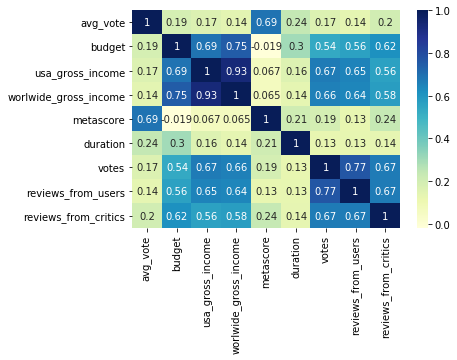

<Figure size 1080x1080 with 0 Axes>

In [19]:
# Matriz de Correlaciones de Pearson
corr_matrix = movies[met_continuas+met_discretas].corr()

#HeatMap Correlaciones
sns.heatmap(corr_matrix, annot=True,cmap="YlGnBu")
plt.figure(figsize=(15,15))
plt.show()

<b>b) Categorica vs Categorica:</b> cuando intentamos visualizar si existe algún tipo de relación entre dos variables categóricas no existe una visualizacion especial con la cual podamos ver esta relación, podríamos por ejemplo construir un heatmap como se mostró anteriormente, sin embargo esto solo nos permitiría ver la relación existente entre 2 variables, más no lo que pasa entre todas las combinaciones existentes.

Por tal motivo, entra nuevamente en juego el cálculo de medidas que nos permitan cuantificar estas relaciones. Para el caso de las medidas Categóricas tenemos como ejemplo el Chi Cuadrado, el cual es una medida que no podemos comparar dado que depende del diferente numero de niveles que tenga cada variable categórica; por lo cual en ocasiones vemos que se compara el p-value que surge a partir de la construcción de una prueba de hipótesis. Es importante tener en cuenta que si bien esta es una alternativa que nos da un "indicio" sobre la independencia entre las variables, podemos encontrar también que esta no es una muy buena práctica ya que estadísticamente este valor lo único que nos indica es un rechazo o una aceptación ante una prueba de independencia.

A pesar de lo anterior, a continuación se muestra como se calcularía este p-value y como construiriamos un heatmap tratando de resolver la pregunta ¿existe alguna relación entre las variables categóricas que tenemos?:

genre genre
genre country
genre language
country genre
country country
country language
language genre
language country
language language


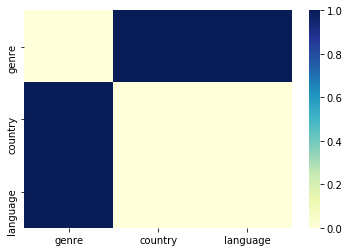

<Figure size 300x300 with 0 Axes>

In [20]:
cat_nominales_interes = [
 'genre',
 'country',
 'language'
 ]

chisqmatrix=pd.DataFrame(movies,columns=cat_nominales_interes,index=cat_nominales_interes)

for icol in cat_nominales_interes:
    for jcol in cat_nominales_interes:
        print(icol,jcol)
        mycrosstab=pd.crosstab(movies[icol],movies[jcol])
        stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
        chisqmatrix.loc[icol,jcol] = p
 
sns.heatmap(chisqmatrix.astype('float64'),cmap="YlGnBu")
my_dpi = 10
plt.figure(figsize=(300/my_dpi, 300/my_dpi), dpi=my_dpi)
plt.show()

Respuesta: Puede existir una relacion entre las variables País (Country) y Lenguage (language), lo cual es algo bastante natural

<b> c) Categóricas vs métricas:</b> Para visualizar el cruce de una variable metrica contra una variable categórica podemos usar nuevamente los boxplot, en esta ocasión intentaremos resolver la pregunta ¿existe alguna diferencia en la calificación promedio (rating) según el país en el cuál fue producida la pelicula ?:

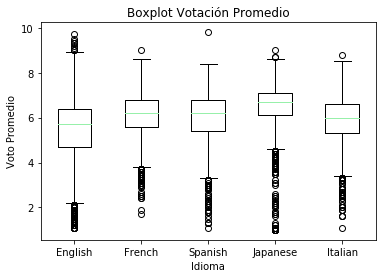

<Figure size 1080x1080 with 0 Axes>

In [55]:
idiomas = ['English', 'French', 'Spanish', 'Japanese', 'Italian'] #Dada la cantidad de idiomas seleccionamos los que serían de nuestro interés, seleccionamos estos idiomas ya que son los 5 más frecuentes
#Con len(movies['language'].unique()) podremos ver cuantos niveles tenemos en la variable idiomas
plt.style.use('seaborn-pastel')
plt.boxplot( [ movies[movies['language']==i]['avg_vote'] for i in idiomas ], vert=True, labels= idiomas)
plt.title('Boxplot Votación Promedio')
plt.ylabel('Voto Promedio')
plt.xlabel('Idioma')
plt.figure(figsize=(15,15))
plt.show()


Nos podemos dar cuenta que la calificacion media de las peliculas en idioma Japonés es superior con respecto a las películas en Ingles, frances o italiano

Finalmente, cuando queremos cuantificar esta relación entre las diferentes combinaciones metrica-categórica que podríamos tener debemos realizar un analisis de varianzas (ANOVA), para lo cual el estadístico habitual evaluado es el F de Fisher y la visualización generalmente utilizada (al igual que cuando comparamosdos variables categoricas) es el p-value que se obtiene como resultado de la prueba de hipótesis

# Paso 6: Elaboración de visualizaciones en PBI

Como se mencionó anteriormente, Jupyter es una IDE destinada al análisis de grandes volumenes de información, donde a pesar de ser una herramienta donde podemos construir algunas visualizaciones, no es una herramienta dedicada a la visualización de información.

Para ello en el mercado existen multiples plataformas que pueden usarse donde para este ejercicio usaremos PowerBI dada su facilidad en el entendimiento ante su uso por parte de los usuarios finales que lo desarrollarán, en el siguiente cuadrante de Gartner podremos darnos cuenta que es la herramienta lider para 2020 (Microsoft):

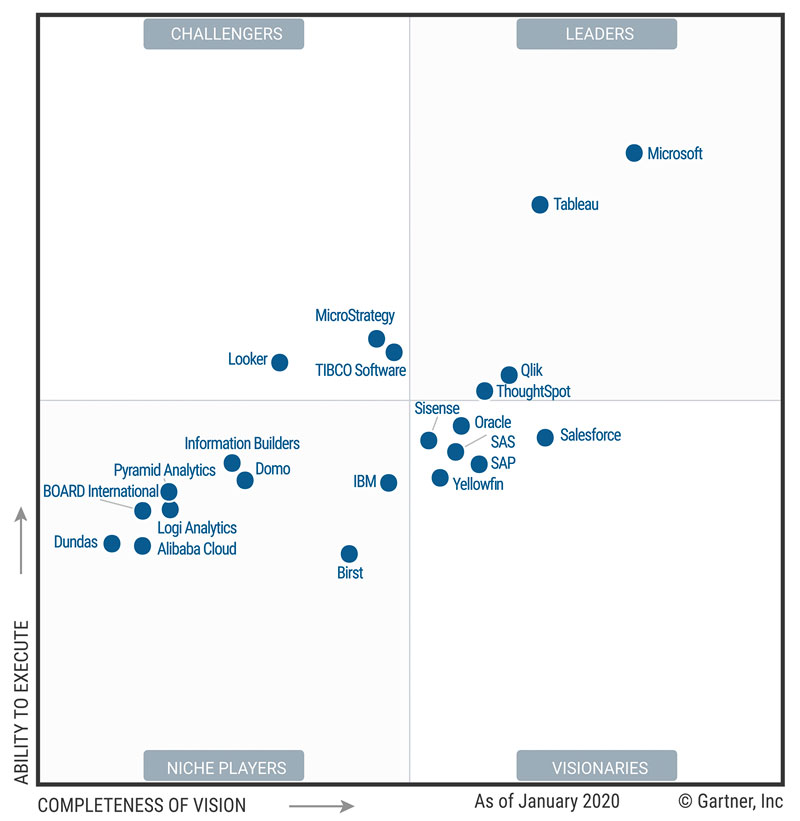

In [3]:
Image('2020_gartner-mq_800.jpg')

Antes de iniciar es importante tener en cuenta:
* Previamente se debe instalar python dentro de PowerBI, lo cual se puede consultar <a href="https://docs.microsoft.com/en-us/power-bi/connect-data/desktop-python-scripts">AQUÍ</a>

* Al usar Python y R en PowerBI se cuenta con algunas limitaciones, las cuales se pueden consultar <a href="https://docs.microsoft.com/en-us/power-bi/connect-data/desktop-python-visuals#:~:text=Known%20limitations,-Python%20visuals%20in&text=Data%20size%20limitations.,a%20limit%20of%20250%20MB.">AQUÍ</a> 

Para iniciar, exportaremos la data de las peliculas con las trasformaciones que previamente hemos elaborado, esta misma tabla será la que ingestaremos dentro de PowerBI Desktop

In [48]:
movies.to_csv('movies.csv')

Obtenemos:

<img src="https://github.com/juankfc/DataScientist-Roadmap/blob/main/Estad%C3%ADstica%20Descriptiva/Paso%200-%20ingesta.jpg?raw=true">


Luego de ingestar la tabla en PowerBI se construirán cada una de las visualizaciones que se crearon previamente en este notebook se utilizarán tanto las visualizaciones con las que por defecto cuenta la herramienta como también construiremos visualiaciones haciendo uso del complemento de Python.

Link para descargar el PowerBI: <a href="https://github.com/juankfc/DataScientist-Roadmap/tree/main/Estad%C3%ADstica%20Descriptiva">Estadística Descriptiva.pbix</a> 

Al descargar el archivo encontraremos que el lienzo construido se encuentra dividido en dos secciones, uno dedicado a los gráficos de análisis univariado y otra dedicada al analisis gráfico bivariado

<img src="https://github.com/juankfc/DataScientist-Roadmap/blob/main/Estad%C3%ADstica%20Descriptiva/muestra%20powerBI.jpg?raw=true" />

Para la elaboración de cada una de las visualizaciones se decidió entre usar los gráficos predefinidos o si construir la visualización con python, esta decisión en la práctica se toma según si el tipo del gráfico se encuentra o no en PowerBI, dando preferencia por las visualizaciones nativas de esta herramienta dada la velocidad con la cual pueden ser creadas.

Por ejemplo, si observamos el Graficos de barras o los Scatterplot, fueron visualiaciones que se construyeron con las herramientas nativas de PowerBI

Por tal motivo, y entendiendo que construir las visualizaciones con las herramientas nativas de PowerBI no representa un gran reto nos concentraremos en la construcción de visualiaciones haciendo uso de Python para lo cual tomaremos como ejemplo la construcción de un boxplot, visualización que no se tiene en PowerBI.

Para llegar a esto, el primer paso es seleccionar el tipo de visualización que deseamos crear (PY) y posteriormente los campos que usaremos para su construcción, por lo cual traeremos el identificador de cada observación (imdb_title_id) y la variable que graficaremos, en este caso el rating promedio por pelicula (avg_vote)

<img src="https://github.com/juankfc/DataScientist-Roadmap/blob/main/Estad%C3%ADstica%20Descriptiva/Paso%201-%20PBI%20Traer%20Campos.jpg?raw=true" />

Si nos imaginamos este resultado en una tabla, seria similar a lo que obtendríamos si ejecutamos el código <code>movies[[['imdb_title_id','avg_vote']]] </code>

Posteriormente, se nos desplegará un espacio donde podremos escribir el codigo en python para construir la visualización deseada. Es importante tener en cuenta que para la construcción de cada visualización es una buena práctica cargar únicamente las librerias que usaremos y que la tabla proveniente de los campos que seleccionemos se llamará <b>dataset</b>, por lo cual para efectos prácticos lo renombraremos como <b>movies</b>

<img src="https://github.com/juankfc/DataScientist-Roadmap/blob/main/Estad%C3%ADstica%20Descriptiva/Paso%202-%20importar%20librerias%20y%20Dataset%20como%20origen.jpg?raw=true" />

Seguido a ello, tendremos que copiar el codigo que creamos en este notebook donde es importante tener en cuenta que la salida (última linea), siempre debe ser un objeto visual, de lo contrario PowerBI desktop nos arrojará un error, en este caso la ultima linea es <code>plt.show()</code> lo cual arroja la visualización deseada

<img src="https://github.com/juankfc/DataScientist-Roadmap/blob/main/Estad%C3%ADstica%20Descriptiva/Paso%203%20-%20Migrar%20codigo%20pensando%20que%20sea%20lo%20m%C3%A1s%20autom%C3%A1tico.jpg?raw=true" />

Como nos podemos dar cuenta comentamos la linea con la cual ajustamos el tamaño de la visualización dado que este atributo puede ser modificado con mayor facilidad desde PowerBI, de esta forma tendremos construido ya nuestro boxplot, lo único que debemos hacer y de estar todo bien elaborado es seleccionar el simbolo de "PLAY" en la esquina superior derecha de nuestro script 


<img src="https://github.com/juankfc/DataScientist-Roadmap/blob/main/Estad%C3%ADstica%20Descriptiva/Paso%204%20-%20visualizaci%C3%B3n%20construida.jpg?raw=true" />



# IMPORTANTE
Así como se pensó en utilizar las facilidades que nos ofrece PowerBI, es una buena práctica evitar crear listas muy especificas o hacer transformaciones muy puntuales ya que esto le quitaría el "dinamismo" con el que nos permite trabajar esta herramienta.

Por ejemplo, si quisieramos construir el boxplot donde queriamos corroborar si existia una diferencia en la calificación promedio (rating) según los 5 idiomas con mayor número de peliculas podríamos sustituir la lista que denominamos "idiomas" con una lista tomada directamente desde la tabla movies haciendo uso del metodo <code>.unique()</code>:

<img src="https://github.com/juankfc/DataScientist-Roadmap/blob/main/Estad%C3%ADstica%20Descriptiva/Paso%205%20a-%20Facilidades%20en%20filtros%20PBI.jpg?raw=true" />


Con lo anterior el inconveniente que tendríamos es que son demasiados los lenguages que tenemos por lo cual, haciendo uso del panel de filtros podemos seleccionar solo aquellos lenguages que tengan un mayor numero de registros en nuestro dataset, con ello en vez de crear la lista <code>[['English', 'French', 'Spanish', 'Japanese', 'Italian']]</code>, filtramos con ayuda de powerBI los idiomas que nos interesan:

<img src="https://github.com/juankfc/DataScientist-Roadmap/blob/main/Estad%C3%ADstica%20Descriptiva/Paso%205%20b-%20Facilidades%20en%20filtros%20PBI.jpg?raw=true" />



# Gracias espero sea de su utilidad!!